# Testing Homography / Perspektiv Transformation

In [24]:
import cv2
import numpy as np

In [25]:
# Load the image and the floor plan
image = cv2.imread("Ch4_image.png")
floor_plan = cv2.imread("Ch4_floorplan.png")

In [26]:
# Convert the images to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_floor_plan = cv2.cvtColor(floor_plan, cv2.COLOR_BGR2GRAY)

In [27]:
# known camera position
camera_position = np.array([0,0,1])

In [28]:

src_pts = []
dst_pts = []


def select_points_img(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        src_pts.append([x, y])
        print("image point selected:", x, y)
        
def select_points_plan(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        dst_pts.append([x, y])
        print("floor plan point selected:", x, y)

cv2.namedWindow("image")
cv2.setMouseCallback("image", select_points_img)

while True:
    cv2.imshow("image", image)
    key = cv2.waitKey(1) & 0xFF
    if key == ord("q"):
        break

cv2.destroyAllWindows()

cv2.namedWindow("floor_plan")
cv2.setMouseCallback("floor_plan", select_points_plan)

while True:
    cv2.imshow("floor_plan", floor_plan)
    key = cv2.waitKey(1) & 0xFF
    if key == ord("q"):
        break

cv2.destroyAllWindows()

# convert the points to numpy array
src_pts = np.array(src_pts)
dst_pts = np.array(dst_pts)

image point selected: 1930 1314
image point selected: 1554 1331
image point selected: 1417 522
image point selected: 1114 531
image point selected: 902 1341
image point selected: 600 1328
floor plan point selected: 463 922
floor plan point selected: 412 921
floor plan point selected: 412 599
floor plan point selected: 339 599
floor plan point selected: 341 920
floor plan point selected: 289 919


In [29]:

# estimate homography
H, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

In [30]:
H

array([[ 5.17716113e-01,  7.96665422e-01, -2.62971958e+02],
       [ 5.10015755e-02,  2.82036841e+00, -2.54509052e+02],
       [ 3.62407830e-05,  2.11930946e-03,  1.00000000e+00]])

In [31]:

# align the image with the floor plan
height, width = gray_floor_plan.shape
aligned_image = cv2.warpPerspective(image, H, (width, height))

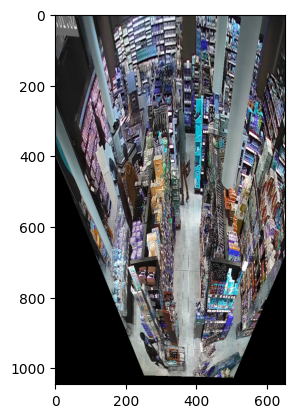

In [32]:
import matplotlib.pyplot as plt

# Display the aligned image
plt.imshow(aligned_image)
plt.show()

In [33]:
# specify the opacity of the overlay
alpha = 0.5 

# create an empty image with the same size as the floor plan
overlay = np.zeros_like(floor_plan)

# copy the aligned image to the overlay
overlay[:, :, :] = aligned_image

# apply the overlay to the floor plan with the specified opacity
result = cv2.addWeighted(floor_plan, 1 - alpha, overlay, alpha, 0)

cv2.imwrite("overlay.jpg", result)

True